In [4]:
# import all the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('Titanic-dataset.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.shape

(891, 12)

In [42]:
df.isnull().sum()
# insights >> this are three columns that have null values 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
 # Fill missing Age values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

In [17]:
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)


In [44]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [45]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
# basic info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
# descriptive statistic 
df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


In [46]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# Value counts for categorical columns
df['Survived'].value_counts() 
# 342 people are survived 

Survived
0    549
1    342
Name: count, dtype: int64

In [22]:
df['Pclass'].value_counts()
# insights >>  most of the passangers are comes from 3rd class

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [23]:
df["Sex"].value_counts()
# insights >> male passangers are more than female passangers

Sex
male      577
female    314
Name: count, dtype: int64

In [24]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

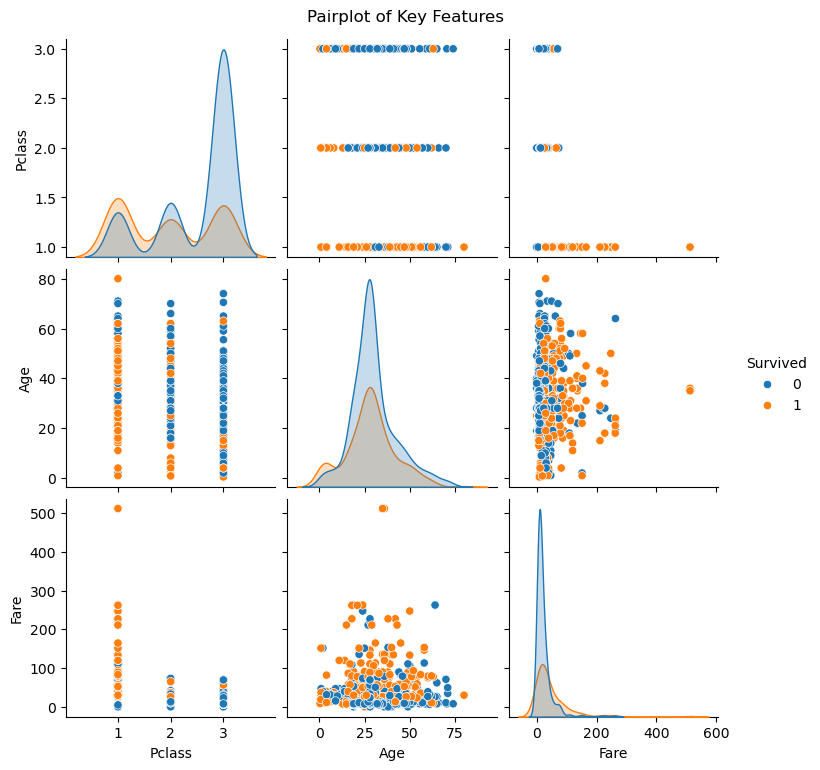

In [26]:
# pairplot
sns.pairplot(df[['Survived','Pclass','Age', 'Fare' ]] , hue = 'Survived')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

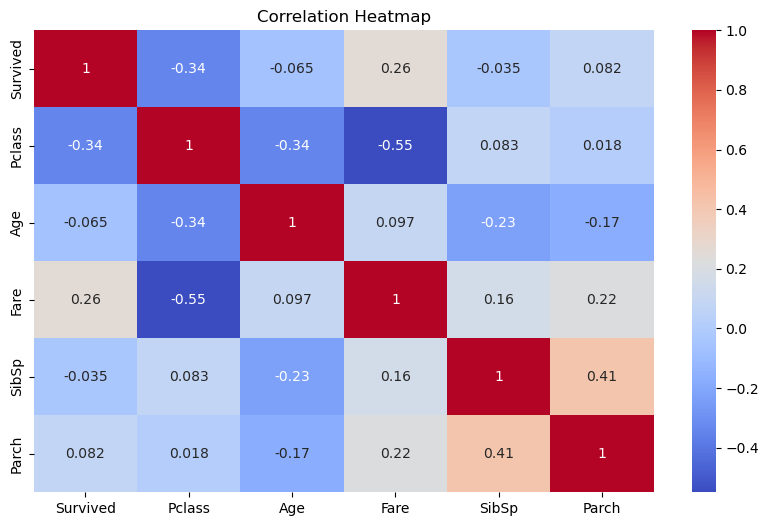

In [27]:
# heatmap of correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [28]:
# insight
#Pairplot shows:
#Survivors tend to have higher fares and lower Pclass (1st class).
#Heatmap reveals:
#Fare and Pclass are negatively correlated.
#Survived is moderately correlated with Fare and Pclass.


## univariate analysis

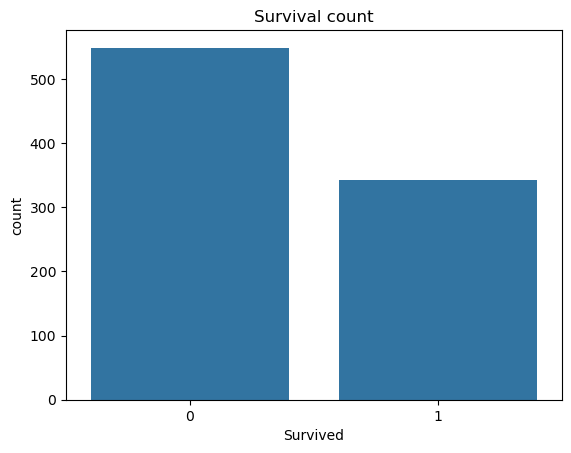

In [47]:
# categorical columns
sns.countplot(data = df, x = 'Survived' )
plt.title("Survival count")
plt.show()

# insights >> more than 500 people are not survived 

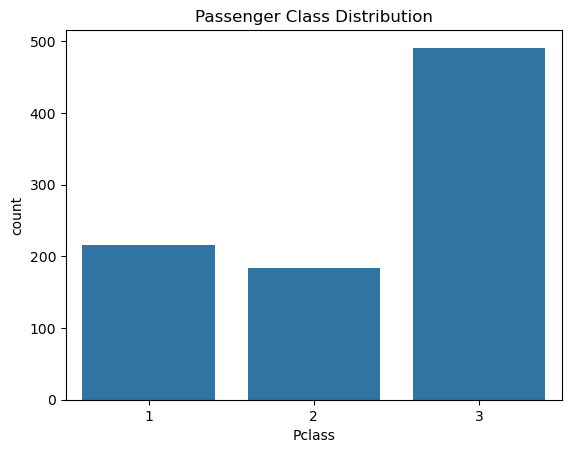

In [30]:
sns.countplot(data = df ,  x = 'Pclass')
plt.title('Passenger Class Distribution')
plt.show()
# insights >> most of the passangers are comes from 3rd class

In [31]:
# numerical 

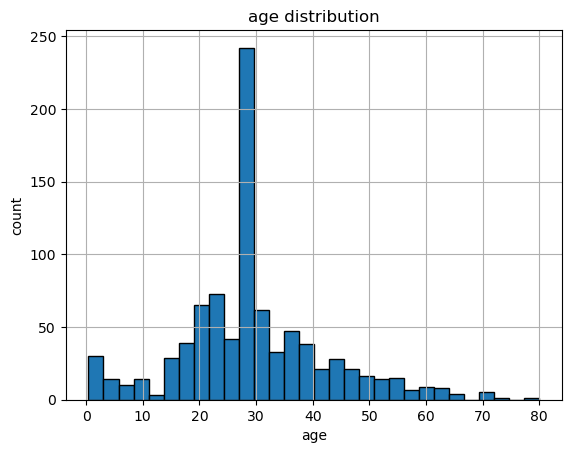

In [48]:
df["Age"].hist(bins = 30, edgecolor = "black")
plt.title('age distribution')
plt.xlabel("age")
plt.ylabel("count")
plt.show()               

# insights >> most of the people are belong from 20-30 age group

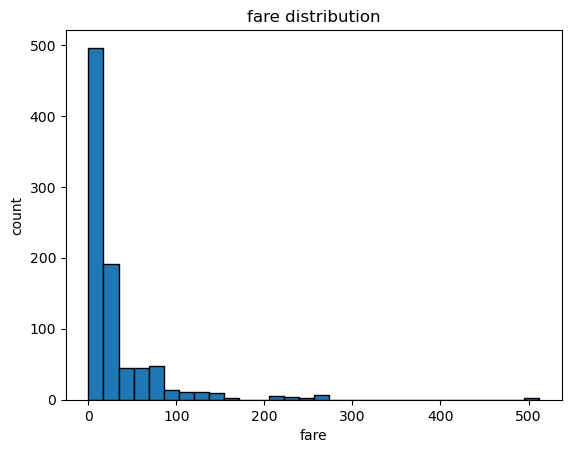

In [33]:
df['Fare'].plot(kind = "hist", bins = 30, edgecolor = "black")
plt.title('fare distribution')
plt.xlabel('fare')
plt.ylabel('count')
plt.show()

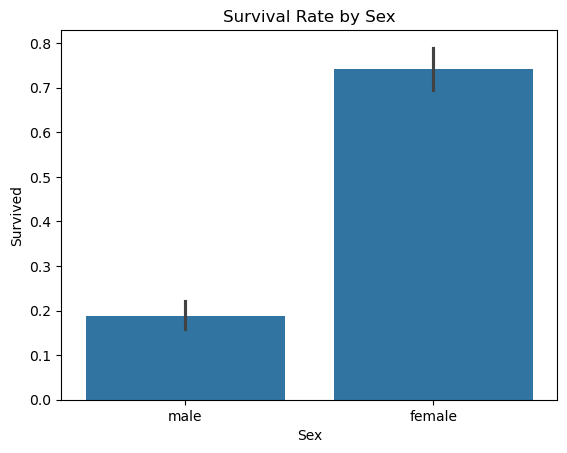

In [34]:
# Survival by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Sex")
plt.show()

# insights >> female passaneger survival rate is more than male passenger

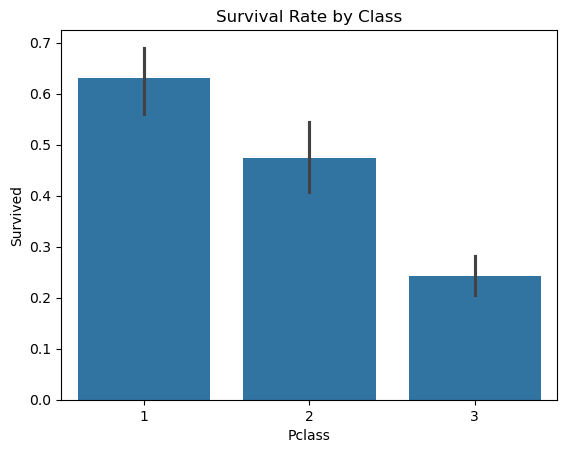

In [49]:
# Survival by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Class")
plt.show()

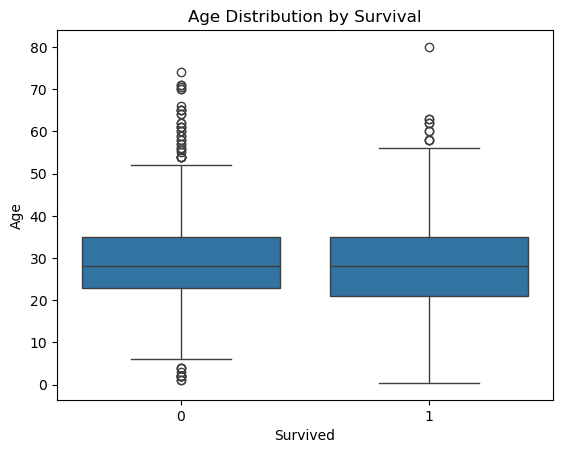

In [36]:
# Age vs Survived
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()


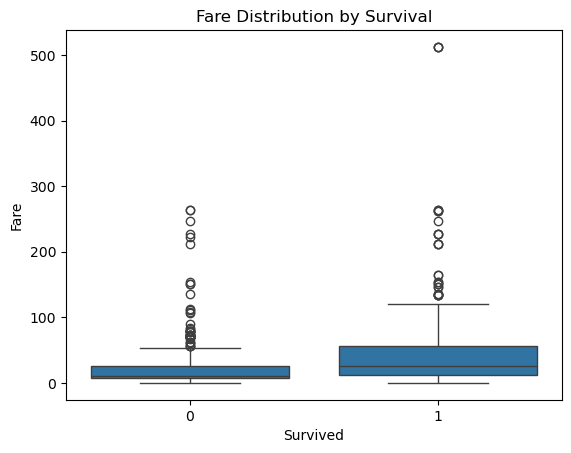

In [37]:
# Fare vs Survived
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by Survival")
plt.show()

In [38]:
#  Multivariate Analysis

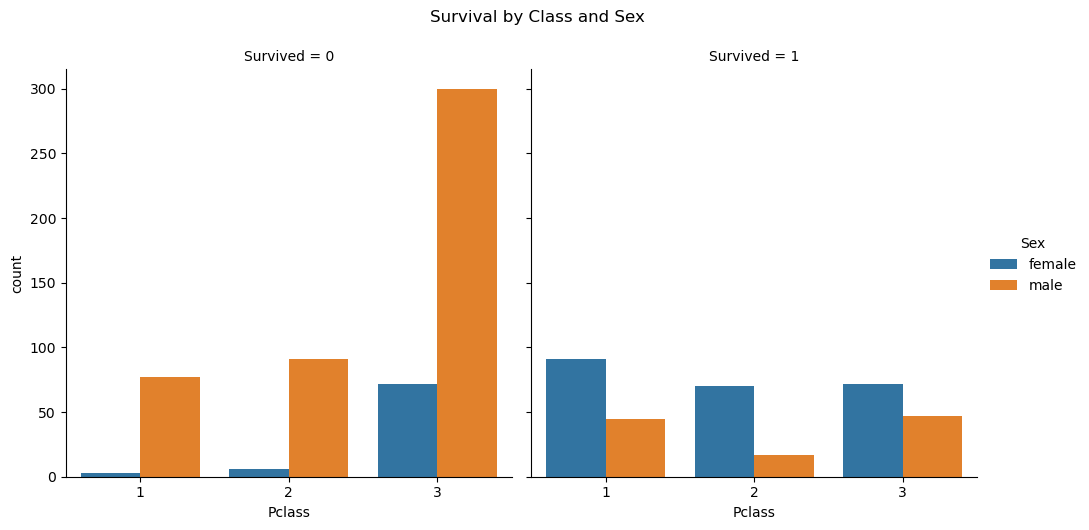

In [39]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', kind='count', data=df)
plt.suptitle("Survival by Class and Sex", y=1.05)
plt.show()

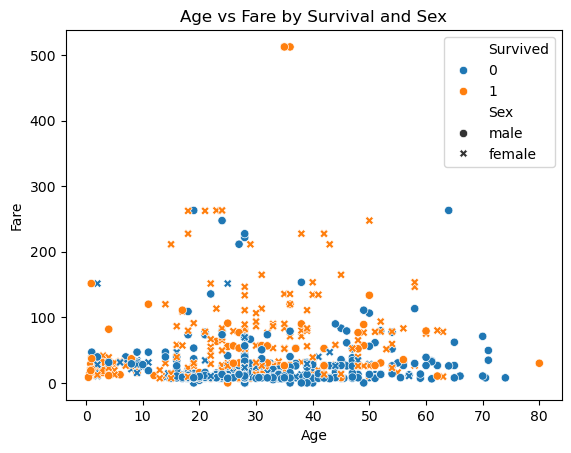

In [40]:
# Scatterplot: Age vs Fare colored by Survival
sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Sex', data=df)
plt.title("Age vs Fare by Survival and Sex")
plt.show()

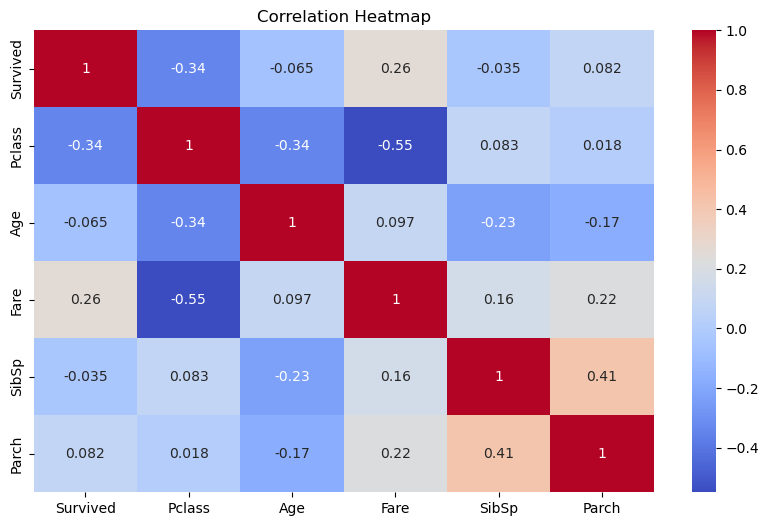

In [41]:
# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()